# Required Libraries Importation

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, RocCurveDisplay, confusion_matrix, ConfusionMatrixDisplay
import ipywidgets as widgets
from IPython.display import display, clear_output
import warnings
warnings.filterwarnings('ignore')

# Dataset Loading

In [2]:
df = pd.read_excel('Cervical Cancer Data.xlsx', engine='openpyxl')

In [3]:
# Display the first 5 rows
print(df.head())

   AutoID  StataID      Type  age SHSClass    CCCause  CCCurable  \
0       1  Pre0001  Pre-test   16    SHS 2    Correct    Correct   
1       2  Pre0002  Pre-test   16    SHS 2    Correct  Incorrect   
2       3  Pre0003  Pre-test   16    SHS 2  Incorrect    Correct   
3       4  Pre0004  Pre-test   17    SHS 2    Correct  Incorrect   
4       5  Pre0005  Pre-test   16    SHS 2    Correct  Incorrect   

  CCNotInWomenLess30yrs CCBeginsInCervix VaginalBleeding  ...  DomainICat  \
0             Incorrect        Incorrect         Correct  ...    Adequate   
1               Correct          Correct         Correct  ...    Adequate   
2             Incorrect        Incorrect         Correct  ...  Inadequate   
3             Incorrect          Correct         Correct  ...    Adequate   
4             Incorrect          Correct         Correct  ...    Adequate   

  DomainIICat DomainIIICat DomainIVCat DomainOverAllCat DomainI DomainII  \
0  Inadequate     Adequate    Adequate         Adequ

In [4]:
# Show dataset shape
print(f"Dataset shape: {df.shape}")

Dataset shape: (2383, 33)


In [5]:
# Check column names and data types
print(df.dtypes)

AutoID                             int64
StataID                           object
Type                              object
age                                int64
SHSClass                          object
CCCause                           object
CCCurable                         object
CCNotInWomenLess30yrs             object
CCBeginsInCervix                  object
VaginalBleeding                   object
FrequentUrination                 object
CCVaginalDischarge                object
PainfulSex                        object
SexAtYoungAge                     object
ManySexualPartners                object
SexualPartnersWithManyPartners    object
ExcessiveWeightGain               object
AvoidSmoking                      object
HPVImmunization                   object
RegularScreenPapSmear             object
RegularExercise                   object
FirstPapSmear                     object
CCPrevention                      object
DomainICat                        object
DomainIICat     

In [6]:
# Get summary statistics
print(df.describe(include='all'))

             AutoID  StataID       Type          age SHSClass  CCCause  \
count   2383.000000     2383       2383  2383.000000     2260     2383   
unique          NaN     2383          2          NaN        3        2   
top             NaN  Pre0001  Post-test          NaN    SHS 2  Correct   
freq            NaN        1       1276          NaN     1023     1617   
mean    1192.000000      NaN        NaN    16.123794      NaN      NaN   
std      688.057168      NaN        NaN     0.870855      NaN      NaN   
min        1.000000      NaN        NaN    14.000000      NaN      NaN   
25%      596.500000      NaN        NaN    16.000000      NaN      NaN   
50%     1192.000000      NaN        NaN    16.000000      NaN      NaN   
75%     1787.500000      NaN        NaN    17.000000      NaN      NaN   
max     2383.000000      NaN        NaN    18.000000      NaN      NaN   

        CCCurable CCNotInWomenLess30yrs CCBeginsInCervix VaginalBleeding  ...  \
count        2383             

# Data Preprocessing

In [7]:
# Check missing values
print("Missing values per column:")
print(df.isnull().sum())

# Drop rows with missing values
df_cleaned = df.dropna()
print("Shape after removing missing values:", df_cleaned.shape)

Missing values per column:
AutoID                              0
StataID                             0
Type                                0
age                                 0
SHSClass                          123
CCCause                             0
CCCurable                           0
CCNotInWomenLess30yrs               0
CCBeginsInCervix                    0
VaginalBleeding                     0
FrequentUrination                   0
CCVaginalDischarge                  0
PainfulSex                          0
SexAtYoungAge                       0
ManySexualPartners                  0
SexualPartnersWithManyPartners      0
ExcessiveWeightGain                 0
AvoidSmoking                        0
HPVImmunization                     0
RegularScreenPapSmear               0
RegularExercise                     0
FirstPapSmear                       0
CCPrevention                        0
DomainICat                          0
DomainIICat                         0
DomainIIICat           

In [8]:
# Check for duplicates
duplicates = df_cleaned.duplicated().sum()
print("Duplicate rows:", duplicates)

# Drop duplicates if any
df_cleaned = df_cleaned.drop_duplicates()
print("Shape after removing duplicates:", df_cleaned.shape)

Duplicate rows: 0
Shape after removing duplicates: (2260, 33)


In [9]:
# Drop non-informative columns
columns_to_drop = ['AutoID', 'StataID']
df_cleaned = df_cleaned.drop(columns=columns_to_drop)

In [10]:
# Encode categorical columns
label_enc = LabelEncoder()

# Identify object (categorical) columns
cat_cols = df_cleaned.select_dtypes(include='object').columns

# Apply LabelEncoder to each categorical column
for col in cat_cols:
    df_cleaned[col] = label_enc.fit_transform(df_cleaned[col])

In [11]:
# Data types
print("Data types after encoding:")
print(df_cleaned.dtypes)

Data types after encoding:
Type                              int32
age                               int64
SHSClass                          int32
CCCause                           int32
CCCurable                         int32
CCNotInWomenLess30yrs             int32
CCBeginsInCervix                  int32
VaginalBleeding                   int32
FrequentUrination                 int32
CCVaginalDischarge                int32
PainfulSex                        int32
SexAtYoungAge                     int32
ManySexualPartners                int32
SexualPartnersWithManyPartners    int32
ExcessiveWeightGain               int32
AvoidSmoking                      int32
HPVImmunization                   int32
RegularScreenPapSmear             int32
RegularExercise                   int32
FirstPapSmear                     int32
CCPrevention                      int32
DomainICat                        int32
DomainIICat                       int32
DomainIIICat                      int32
DomainIVCat  

In [12]:
# Data preview
print("Sample of preprocessed data:")
print(df_cleaned.head())

Sample of preprocessed data:
   Type  age  SHSClass  CCCause  CCCurable  CCNotInWomenLess30yrs  \
0     1   16         1        0          0                      1   
1     1   16         1        0          1                      0   
2     1   16         1        1          0                      1   
3     1   17         1        0          1                      1   
4     1   16         1        0          1                      1   

   CCBeginsInCervix  VaginalBleeding  FrequentUrination  CCVaginalDischarge  \
0                 1                0                  1                   1   
1                 0                0                  0                   0   
2                 1                0                  1                   0   
3                 0                0                  1                   0   
4                 0                0                  0                   0   

   ...  DomainICat  DomainIICat  DomainIIICat  DomainIVCat  DomainOverAllCat  \
0

# Exploratory Data Analysis (EDA)

In [13]:
# Set plot style
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

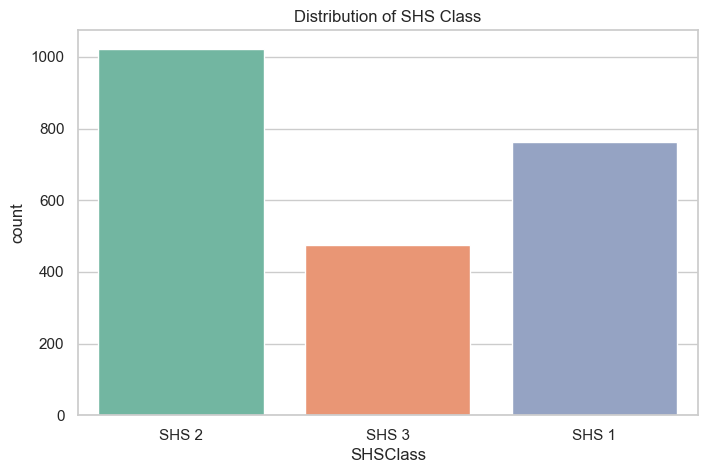

In [14]:
# Bar plot of SHS Class distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='SHSClass', palette='Set2')
plt.title("Distribution of SHS Class")
plt.show()

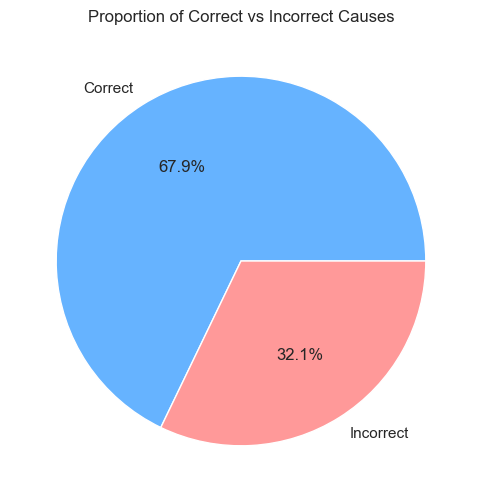

In [15]:
# Pie chart of CCCause responses
plt.figure(figsize=(6, 6))
df['CCCause'].value_counts().plot.pie(autopct='%1.1f%%', colors=['#66b3ff', '#ff9999'])
plt.title("Proportion of Correct vs Incorrect Causes")
plt.ylabel('')
plt.show()

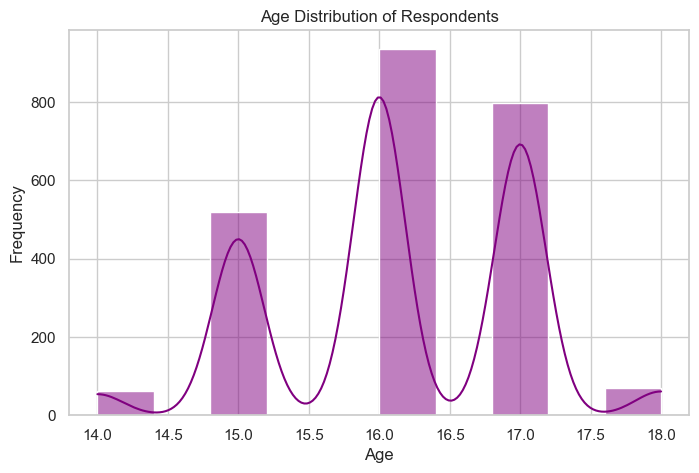

In [16]:
# Histogram of age
plt.figure(figsize=(8, 5))
sns.histplot(df['age'], bins=10, kde=True, color='purple')
plt.title("Age Distribution of Respondents")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

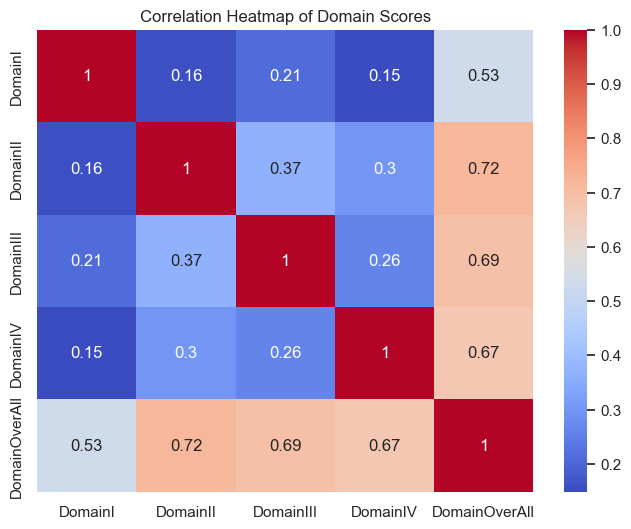

In [17]:
# Heatmap of correlations among domain scores
plt.figure(figsize=(8, 6))
domain_cols = ['DomainI', 'DomainII', 'DomainIII', 'DomainIV', 'DomainOverAll']
sns.heatmap(df[domain_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Domain Scores")
plt.show()

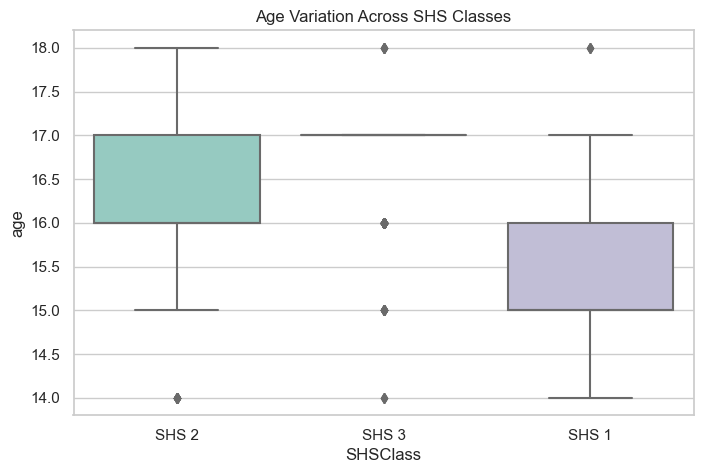

In [18]:
# Boxplot of age by SHSClass
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='SHSClass', y='age', palette='Set3')
plt.title("Age Variation Across SHS Classes")
plt.show()

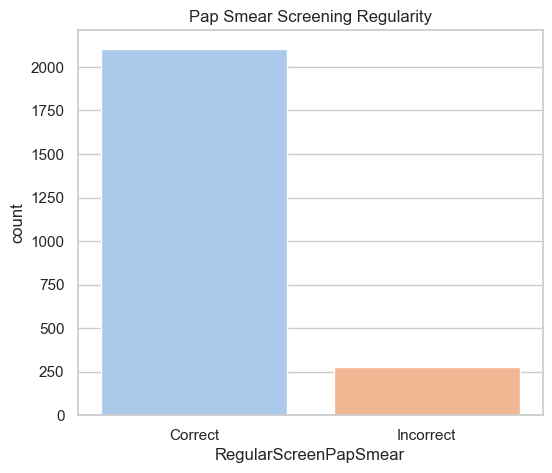

In [19]:
# Count plot of RegularScreenPapSmear
plt.figure(figsize=(6, 5))
sns.countplot(data=df, x='RegularScreenPapSmear', palette='pastel')
plt.title("Pap Smear Screening Regularity")
plt.show()

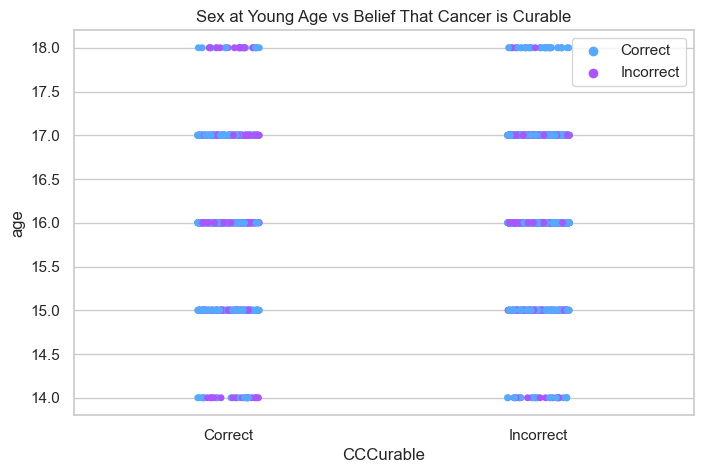

In [20]:
# Strip plot for SexAtYoungAge by CCCurable
plt.figure(figsize=(8, 5))
sns.stripplot(data=df, x='CCCurable', y='age', hue='SexAtYoungAge', palette='cool')
plt.title("Sex at Young Age vs Belief That Cancer is Curable")
plt.legend(loc='upper right')
plt.show()

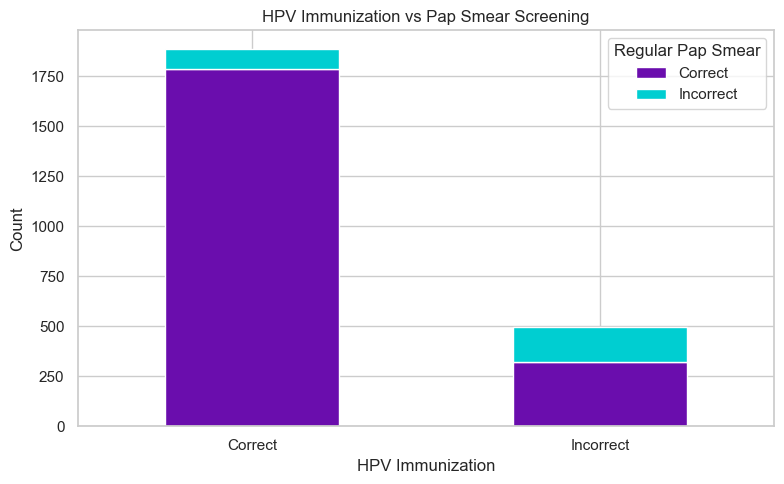

In [21]:
# Stacked bar plot of 'HPVImmunization' vs 'RegularScreenPapSmear'
hpv_screen = pd.crosstab(df['HPVImmunization'], df['RegularScreenPapSmear'])

hpv_screen.plot(kind='bar', stacked=True, color=['#6a0dad', '#00ced1'], figsize=(8, 5))
plt.title("HPV Immunization vs Pap Smear Screening")
plt.xlabel("HPV Immunization")
plt.ylabel("Count")
plt.legend(title="Regular Pap Smear")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

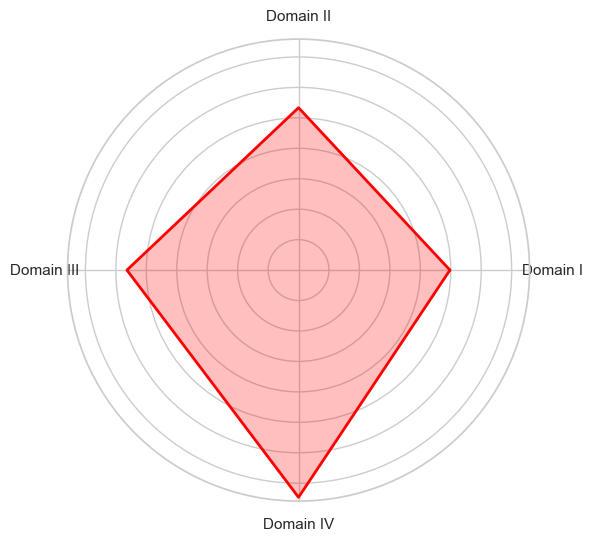

In [22]:
# Radar chart of average domain scores
domain_means = df[['DomainI', 'DomainII', 'DomainIII', 'DomainIV']].mean().values
labels = ['Domain I', 'Domain II', 'Domain III', 'Domain IV']

angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
domain_means = np.concatenate((domain_means, [domain_means[0]]))  # Close loop
angles += angles[:1]

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, polar=True)
ax.plot(angles, domain_means, color='red', linewidth=2)
ax.fill(angles, domain_means, color='red', alpha=0.25)
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
plt.show()

# Machine Learning Models

In [23]:
# Features and Target
X = df_cleaned[['age', 'SexAtYoungAge', 'HPVImmunization', 'VaginalBleeding',
                'FrequentUrination', 'CCVaginalDischarge', 'PainfulSex',
                'AvoidSmoking', 'RegularExercise', 'RegularScreenPapSmear']]
y = df_cleaned['DomainOverAllCat']

In [24]:
# Train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

In [25]:
# Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Logistic Regression

In [26]:
# Model
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)
y_pred = lr.predict(X_test_scaled)
y_proba = lr.predict_proba(X_test_scaled)[:, 1]

# Evaluation
accuracy = accuracy_score(y_test, y_pred) * 100
print(f"Logistic Regression Accuracy: {accuracy:.2f}%\n")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))

Logistic Regression Accuracy: 95.13%

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       393
           1       0.85      0.76      0.80        59

    accuracy                           0.95       452
   macro avg       0.91      0.87      0.89       452
weighted avg       0.95      0.95      0.95       452

ROC-AUC Score: 0.9753956958640617


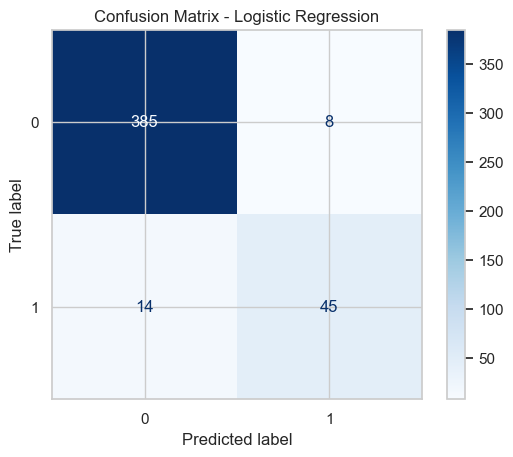

In [27]:
# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(lr, X_test_scaled, y_test, cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

## Decision Trees

In [28]:
# Model
dt = DecisionTreeClassifier()
dt.fit(X_train_scaled, y_train)
y_pred = dt.predict(X_test_scaled)
y_proba = dt.predict_proba(X_test_scaled)[:, 1]

# Evaluation
accuracy = accuracy_score(y_test, y_pred) * 100
print(f"Decision Tree Accuracy: {accuracy:.2f}%\n")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))

Decision Tree Accuracy: 92.26%

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96       393
           1       0.74      0.63      0.68        59

    accuracy                           0.92       452
   macro avg       0.84      0.80      0.82       452
weighted avg       0.92      0.92      0.92       452

ROC-AUC Score: 0.8234786733945746


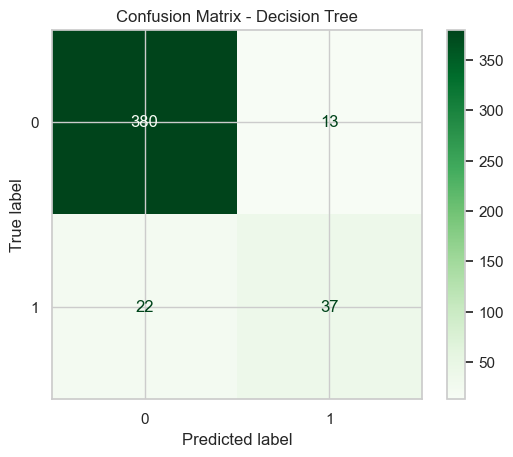

In [29]:
# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(dt, X_test_scaled, y_test, cmap='Greens')
plt.title("Confusion Matrix - Decision Tree")
plt.show()

## Random Forest

In [30]:
# Model
rf = RandomForestClassifier()
rf.fit(X_train_scaled, y_train)
y_pred = rf.predict(X_test_scaled)
y_proba = rf.predict_proba(X_test_scaled)[:, 1]

# Evaluation
accuracy = accuracy_score(y_test, y_pred) * 100
print(f"Random Forest Accuracy: {accuracy:.2f}%\n")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))

Random Forest Accuracy: 92.70%

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96       393
           1       0.77      0.63      0.69        59

    accuracy                           0.93       452
   macro avg       0.86      0.80      0.83       452
weighted avg       0.92      0.93      0.92       452

ROC-AUC Score: 0.9543278561262777


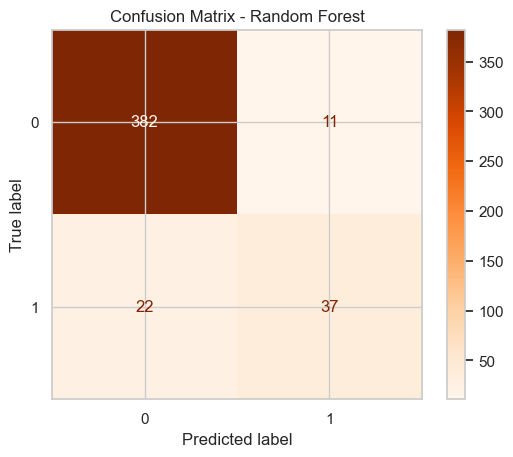

In [31]:
# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(rf, X_test_scaled, y_test, cmap='Oranges')
plt.title("Confusion Matrix - Random Forest")
plt.show()

## Support Vector Machines

In [32]:
# Model
svm = SVC(probability=True)
svm.fit(X_train_scaled, y_train)
y_pred = svm.predict(X_test_scaled)
y_proba = svm.predict_proba(X_test_scaled)[:, 1]

# Evaluation
accuracy = accuracy_score(y_test, y_pred) * 100
print(f"SVM Accuracy: {accuracy:.2f}%\n")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))

SVM Accuracy: 93.58%

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.96       393
           1       0.83      0.64      0.72        59

    accuracy                           0.94       452
   macro avg       0.89      0.81      0.84       452
weighted avg       0.93      0.94      0.93       452

ROC-AUC Score: 0.9374002673912105


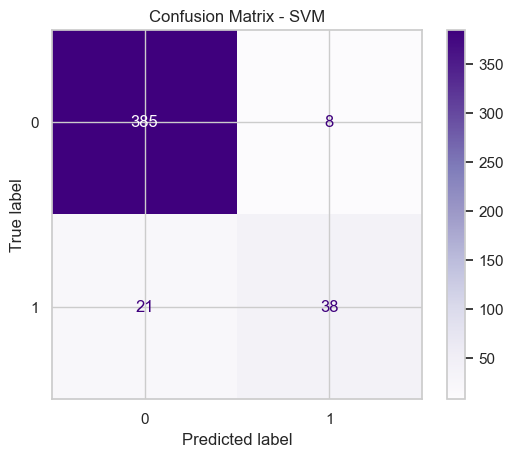

In [33]:
# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(svm, X_test_scaled, y_test, cmap='Purples')
plt.title("Confusion Matrix - SVM")
plt.show()

## Model Comparisons

### Accuracy Comparison

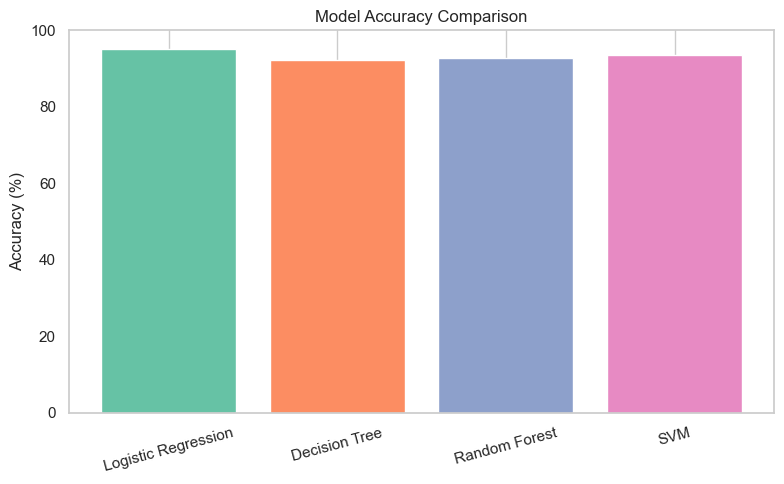

In [34]:
# Accuracy Scores
accuracies = [lr.score(X_test_scaled, y_test),
              dt.score(X_test_scaled, y_test),
              rf.score(X_test_scaled, y_test),
              svm.score(X_test_scaled, y_test)]

models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM']

# Use a seaborn color palette
colors = sns.color_palette('Set2', len(models))

# Plot
plt.figure(figsize=(8, 5))
plt.bar(models, [a * 100 for a in accuracies], color=colors)
plt.ylabel('Accuracy (%)')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 100)
plt.xticks(rotation=15)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

### Evaluation Metrics Comparison

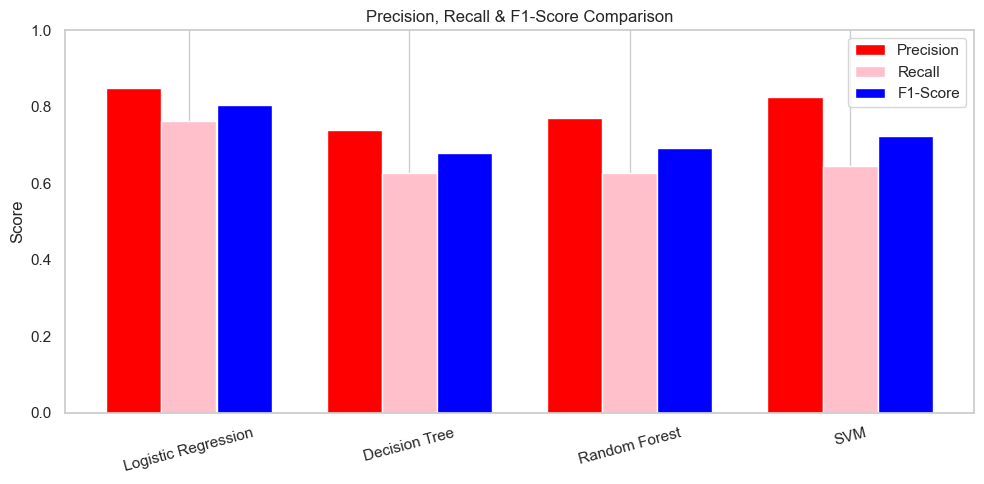

In [35]:
# Metrics
precision = [precision_score(y_test, m.predict(X_test_scaled)) for m in [lr, dt, rf, svm]]
recall = [recall_score(y_test, m.predict(X_test_scaled)) for m in [lr, dt, rf, svm]]
f1 = [f1_score(y_test, m.predict(X_test_scaled)) for m in [lr, dt, rf, svm]]

import numpy as np

x = np.arange(len(models))
width = 0.25

# Plot
plt.figure(figsize=(10, 5))
plt.bar(x - width, precision, width, label='Precision', color='red')
plt.bar(x, recall, width, label='Recall', color='pink')
plt.bar(x + width, f1, width, label='F1-Score', color='blue')

plt.ylabel('Score')
plt.title('Precision, Recall & F1-Score Comparison')
plt.xticks(x, models, rotation=15)
plt.ylim(0, 1)
plt.legend()
plt.tight_layout()
plt.grid(axis='y')
plt.show()


### ROC-AUC Comparison

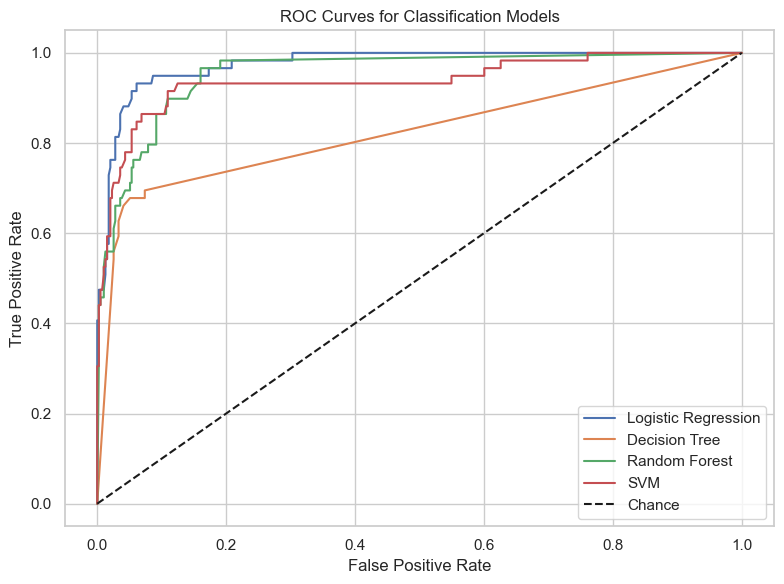

In [36]:
# ROC Curves
plt.figure(figsize=(8, 6))

# Logistic Regression
fpr_lr, tpr_lr, _ = roc_curve(y_test, lr.predict_proba(X_test_scaled)[:, 1])
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression')

# Decision Tree
fpr_dt, tpr_dt, _ = roc_curve(y_test, dt.predict_proba(X_test_scaled)[:, 1])
plt.plot(fpr_dt, tpr_dt, label='Decision Tree')

# Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf.predict_proba(X_test_scaled)[:, 1])
plt.plot(fpr_rf, tpr_rf, label='Random Forest')

# SVM
fpr_svm, tpr_svm, _ = roc_curve(y_test, svm.predict_proba(X_test_scaled)[:, 1])
plt.plot(fpr_svm, tpr_svm, label='SVM')

# Plot settings
plt.plot([0, 1], [0, 1], 'k--', label='Chance')
plt.title('ROC Curves for Classification Models')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Cervical Cancer Risk Prediction GUI

In [37]:
# Input widgets
age = widgets.IntSlider(value=16, min=14, max=18, description='Age:')
sex_at_young_age = widgets.Dropdown(options=[('No', 0), ('Yes', 1)], description='Sex Young:')
hpv_immunization = widgets.Dropdown(options=[('No', 0), ('Yes', 1)], description='HPV Vaccine:')
vaginal_bleeding = widgets.Dropdown(options=[('No', 0), ('Yes', 1)], description='Bleeding:')
frequent_urination = widgets.Dropdown(options=[('No', 0), ('Yes', 1)], description='Urination:')
vaginal_discharge = widgets.Dropdown(options=[('No', 0), ('Yes', 1)], description='Discharge:')
painful_sex = widgets.Dropdown(options=[('No', 0), ('Yes', 1)], description='Painful Sex:')
avoid_smoking = widgets.Dropdown(options=[('No', 0), ('Yes', 1)], description='Avoid Smoking:')
regular_exercise = widgets.Dropdown(options=[('No', 0), ('Yes', 1)], description='Exercise:')
regular_screen = widgets.Dropdown(options=[('No', 0), ('Yes', 1)], description='Pap Smear:')

# Button
predict_btn = widgets.Button(description="Predict Cancer Risk", button_style='danger')
output = widgets.Output()

# Prediction logic
def on_predict_clicked(b):
    with output:
        clear_output()

        # Gather input
        input_data = np.array([[age.value,
                                sex_at_young_age.value,
                                hpv_immunization.value,
                                vaginal_bleeding.value,
                                frequent_urination.value,
                                vaginal_discharge.value,
                                painful_sex.value,
                                avoid_smoking.value,
                                regular_exercise.value,
                                regular_screen.value]])

        # Scale and predict
        input_scaled = scaler.transform(input_data)
        pred = lr.predict(input_scaled)[0]

        # Label mapping
        label_map = {0: "Low Risk", 1: "High Risk"}
        print("Predicted Cervical Cancer Risk Level:", label_map.get(pred, "Unknown"))

# Bind and display
predict_btn.on_click(on_predict_clicked)

display(widgets.VBox([
    age, sex_at_young_age, hpv_immunization, vaginal_bleeding,
    frequent_urination, vaginal_discharge, painful_sex,
    avoid_smoking, regular_exercise, regular_screen,
    predict_btn, output
]))